**Introduction**

Consumers in their daily shopping activity come across various product choices under one catergory which sometimes becomes very difficult for the customer to make a preference. Most of these products comes along with their reviews where customers who had already purchased a product leaves a rating after using the purchased product and a brief description of their expereience(reviews). Ratings from consumers can easily be sorted(high or low) to help customers in deciding on a particular product but reviews usually take on different dimension. Reviews are usually sentence based which calls for it to be read thoroughly to determine whether they are positive or negative reviews.With the help of Natural Language Processing(NLP), things like this has gotten easily to analyze and convey insightful decisions.

In [1]:
#Import Required libraries
#Basic libraries
import pandas as pd
import numpy as np


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
#importing dataset
df = pd.read_csv('/content/1429_1.csv')

In [3]:
## Getting the first 5 rows
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(34660, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating    

In [5]:
df.nunique()

id                         42
name                       48
asins                      41
brand                       6
categories                 41
keys                       42
manufacturer                2
reviews.date             1078
reviews.dateAdded        1941
reviews.dateSeen         3911
reviews.didPurchase         1
reviews.doRecommend         2
reviews.id                  1
reviews.numHelpful         97
reviews.rating              5
reviews.sourceURLs      11929
reviews.text            34659
reviews.title           19767
reviews.userCity            0
reviews.userProvince        0
reviews.username        26789
dtype: int64

In [6]:
df['reviews.doRecommend'].value_counts()

True     32682
False     1384
Name: reviews.doRecommend, dtype: int64

In [7]:
df['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

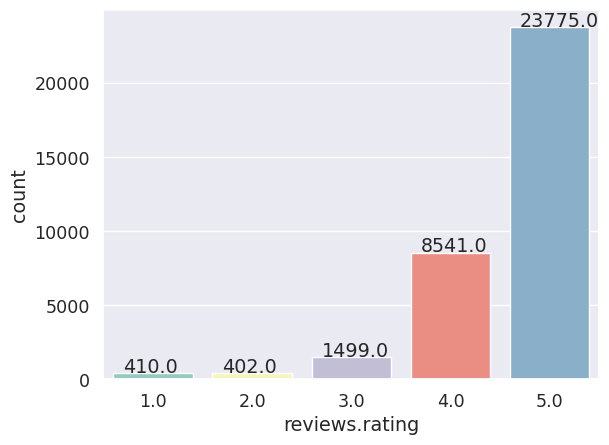

In [9]:
## visualizing review ratings.
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='reviews.rating',data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

**Data Preprocessing/Cleaning**

For the purpose of exploratory analysis the dataset is taken through the process of cleaning which involves checking on patterns, null or missing values and detecting outliers.

In [10]:
## Creating a copy of the dataset
df_reviews= df.copy()

## checking for missing values
df_reviews.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

**Dropping columns with high null values and keeping only important columns.**

In [11]:
df_reviews.drop(['id','asins','name','brand','categories','keys','reviews.numHelpful','reviews.userCity','reviews.userProvince','reviews.sourceURLs','manufacturer','reviews.date','reviews.dateAdded','reviews.id','reviews.dateSeen','reviews.didPurchase','reviews.username','reviews.userProvince','reviews.userCity'],axis=1,inplace=True)

In [12]:
df_reviews.head()

,reviews.doRecommend,reviews.rating,reviews.text,reviews.title
0,True,5.0,This product so far has not disappointed. My c...,Kindle
1,True,5.0,great for beginner or experienced person. Boug...,very fast
2,True,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,True,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [13]:
## checking for null or missing values again
df_reviews.isnull().sum()

reviews.doRecommend    594
reviews.rating          33
reviews.text             1
reviews.title            5
dtype: int64

**Drop rows with reviews.rating that's null**

In [14]:
df_reviews.dropna(subset = ['reviews.rating'],inplace=True)

**Fill remaining null values with space**

In [15]:
df_reviews.fillna("",inplace=True)

In [16]:
df_reviews.isnull().sum()

reviews.doRecommend    0
reviews.rating         0
reviews.text           0
reviews.title          0
dtype: int64

**Concat 'reviews.text' and 'reviews.title' column.**

Let's combine review text and and review title columns

In [17]:
df_reviews['ReviewText'] = df_reviews['reviews.text']+df_reviews['reviews.title']
df_reviews['ReviewText'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.Kindle'

**Dropping 'reviews.text' and 'reviews.title'**

In [18]:
df_reviews.drop(['reviews.text','reviews.title'],axis=1,inplace=True)

**Renaming 'reviews.ratings' column to 'Ratings' and 'reviews.doRecommend' to 'Recommend'.**

In [19]:
df_reviews.rename(columns={'reviews.rating':'Ratings'}, inplace=True)

In [20]:
df_reviews.rename(columns={'reviews.doRecommend':'Recommend'}, inplace=True)

In [21]:
## Let's take a look at our dataset again
df_reviews.head()

,Recommend,Ratings,ReviewText
0,True,5.0,This product so far has not disappointed. My c...
1,True,5.0,great for beginner or experienced person. Boug...
2,True,5.0,Inexpensive tablet for him to use and learn on...
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...
4,True,5.0,I bought this for my grand daughter when she c...


**Creating 'sentiment' column**

This is an important preprocessing phase, since we are determining the outcome column based on the ratings made by customers. If the score is greater than 3, we assume that as a positive sentiment, if the rating is less than 3 then we will consider that as negative sentiment and ratings equalto 3 will be considered as neutral sentiment.

In [23]:
def sentiment(rating):
    """
    This function will return sentiment value based on the ratings.
    """

    if rating==3.0:
        value='Neutral'
    elif rating==4.0 or rating==5.0:
        value='Positive'
    elif rating==1.0 or rating==2.0:
        value='Negative'
    else:
        value = -1

    return value

df_reviews['Sentiment'] = df_reviews.apply(lambda row : sentiment(row['Ratings']), axis=1)

In [24]:
df_reviews.head()

,Recommend,Ratings,ReviewText,Sentiment
0,True,5.0,This product so far has not disappointed. My c...,Positive
1,True,5.0,great for beginner or experienced person. Boug...,Positive
2,True,5.0,Inexpensive tablet for him to use and learn on...,Positive
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Positive
4,True,5.0,I bought this for my grand daughter when she c...,Positive


**Sentiment Distribution**

In [25]:
df_reviews.Sentiment.value_counts()

Positive    32316
Neutral      1499
Negative      812
Name: Sentiment, dtype: int64

In [69]:
df_reviews.Ratings.value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: Ratings, dtype: int64

**Create Subjectivity and Polarity columns based on 'ReviewText' using TextBlob**

In [26]:
#create func to get subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create func to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create 2 columns subjectivity,polarity

df_reviews['Subjectivity'] = df_reviews['ReviewText'].apply(getSubjectivity)
df_reviews['Polarity'] = df_reviews['ReviewText'].apply(getPolarity)

**Creating Analysis Column based on Polarity**


In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
#Create a func to compute the Negative , Neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_reviews['Polarity_Analysis'] = df_reviews['Polarity'].apply(getAnalysis)

In [28]:
df_reviews.head()

,Recommend,Ratings,ReviewText,Sentiment,Subjectivity,Polarity,Polarity_Analysis
0,True,5.0,This product so far has not disappointed. My c...,Positive,0.783333,0.325000,Positive
1,True,5.0,great for beginner or experienced person. Boug...,Positive,0.750000,0.600000,Positive
2,True,5.0,Inexpensive tablet for him to use and learn on...,Positive,0.450000,0.350000,Positive
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Positive,0.731250,0.399583,Positive
4,True,5.0,I bought this for my grand daughter when she c...,Positive,0.616226,0.368056,Positive


**Polarity Distribution**

<Axes: >

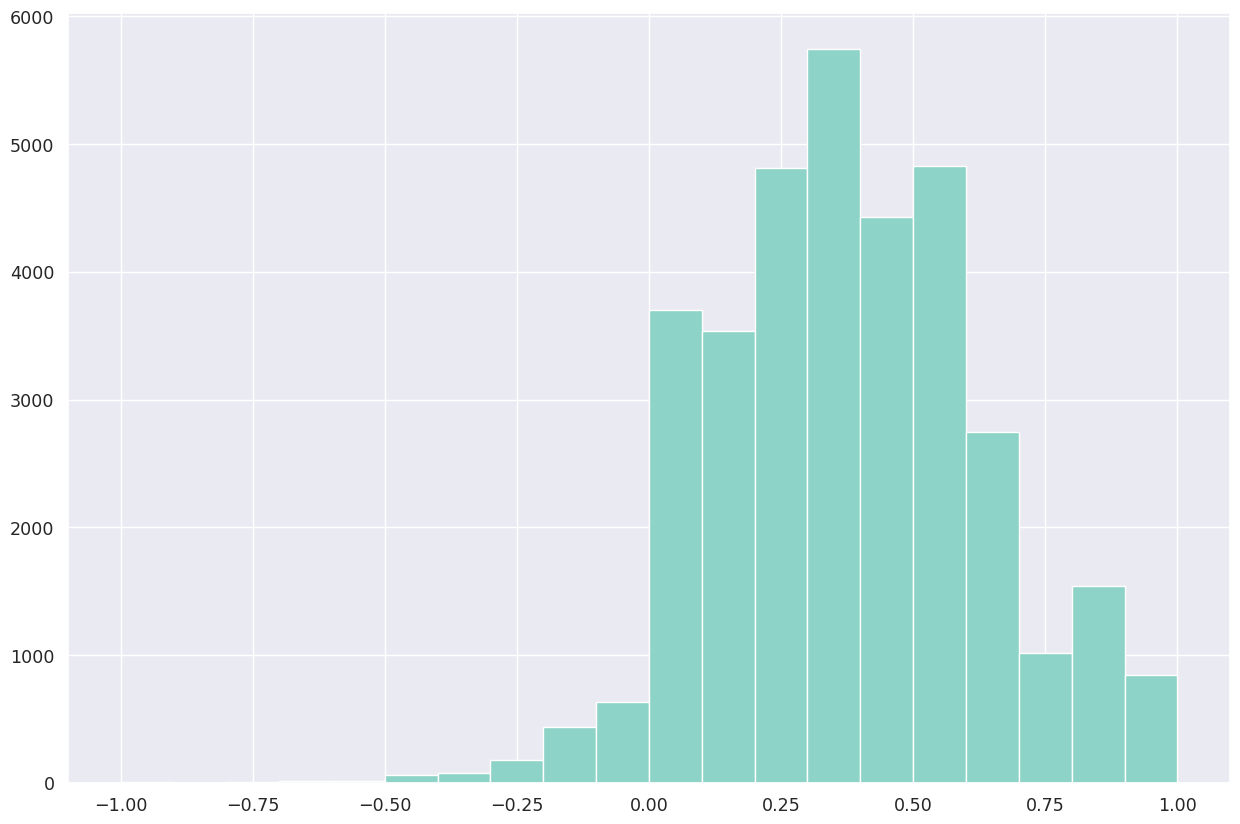

In [30]:
df_reviews["Polarity"].hist(bins=20, figsize=(15, 10))

**Insight**

From the above plot it can be observed that there a lot of positive polarities as compared to negative polarities.
It can however be assummed that the polarity is positively skewed and normally distributed but not standard normal.

**Creating more features for text analysis**

Now, lets create new columns for reviewText length and word count.
Review Text length- we use the length of reviews which includes each letters and spaced.

In [31]:
df_reviews['review_len'] = df_reviews['ReviewText'].astype(str).apply(len)
df_reviews['word_count'] = df_reviews['ReviewText'].apply(lambda x: len(str(x).split()))

In [32]:
df_reviews.head()

,Recommend,Ratings,ReviewText,Sentiment,Subjectivity,Polarity,Polarity_Analysis,review_len,word_count
0,True,5.0,This product so far has not disappointed. My c...,Positive,0.783333,0.325000,Positive,149,27
1,True,5.0,great for beginner or experienced person. Boug...,Positive,0.750000,0.600000,Positive,84,15
2,True,5.0,Inexpensive tablet for him to use and learn on...,Positive,0.450000,0.350000,Positive,170,33
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Positive,0.731250,0.399583,Positive,600,117
4,True,5.0,I bought this for my grand daughter when she c...,Positive,0.616226,0.368056,Positive,638,120


**Review Text Length Distribution**

<Axes: >

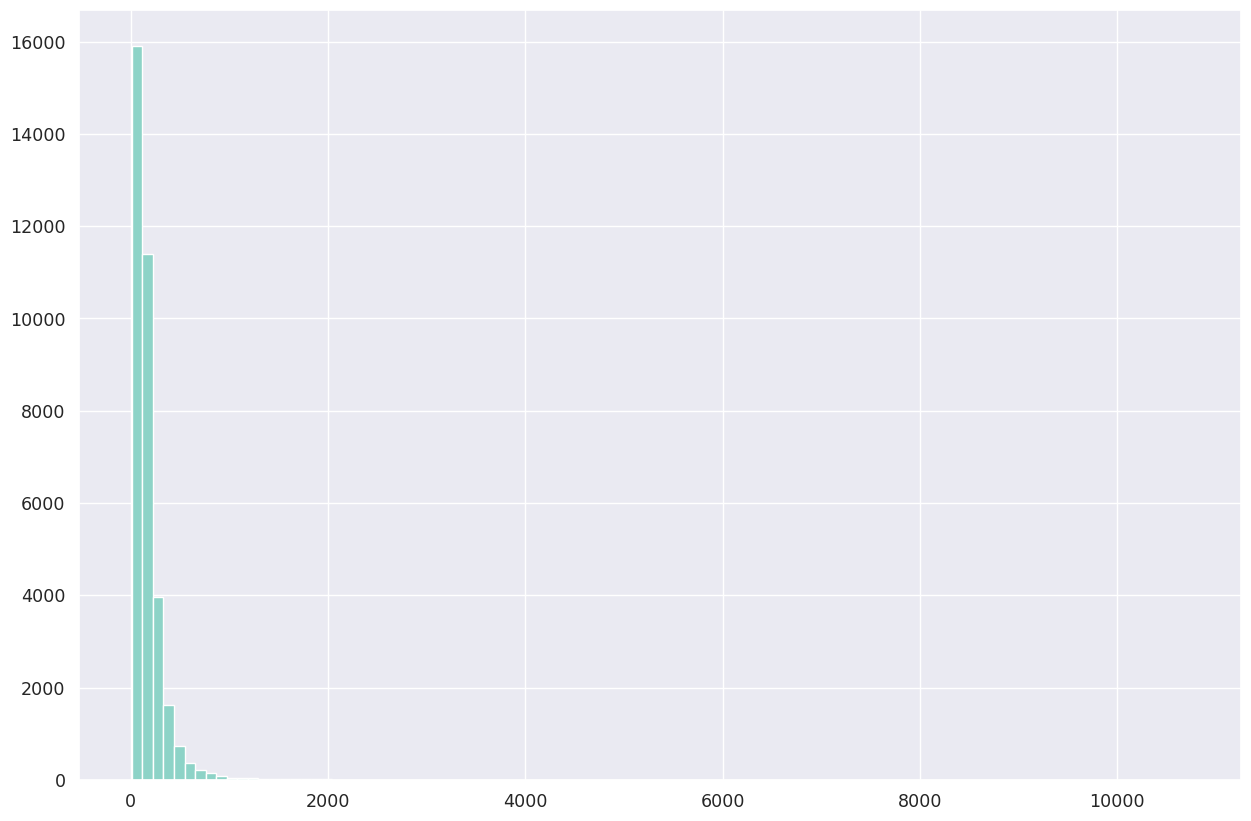

In [33]:
df_reviews["review_len"].hist(bins=100, figsize=(15,10))

**Word Count Distribution**


<Axes: >

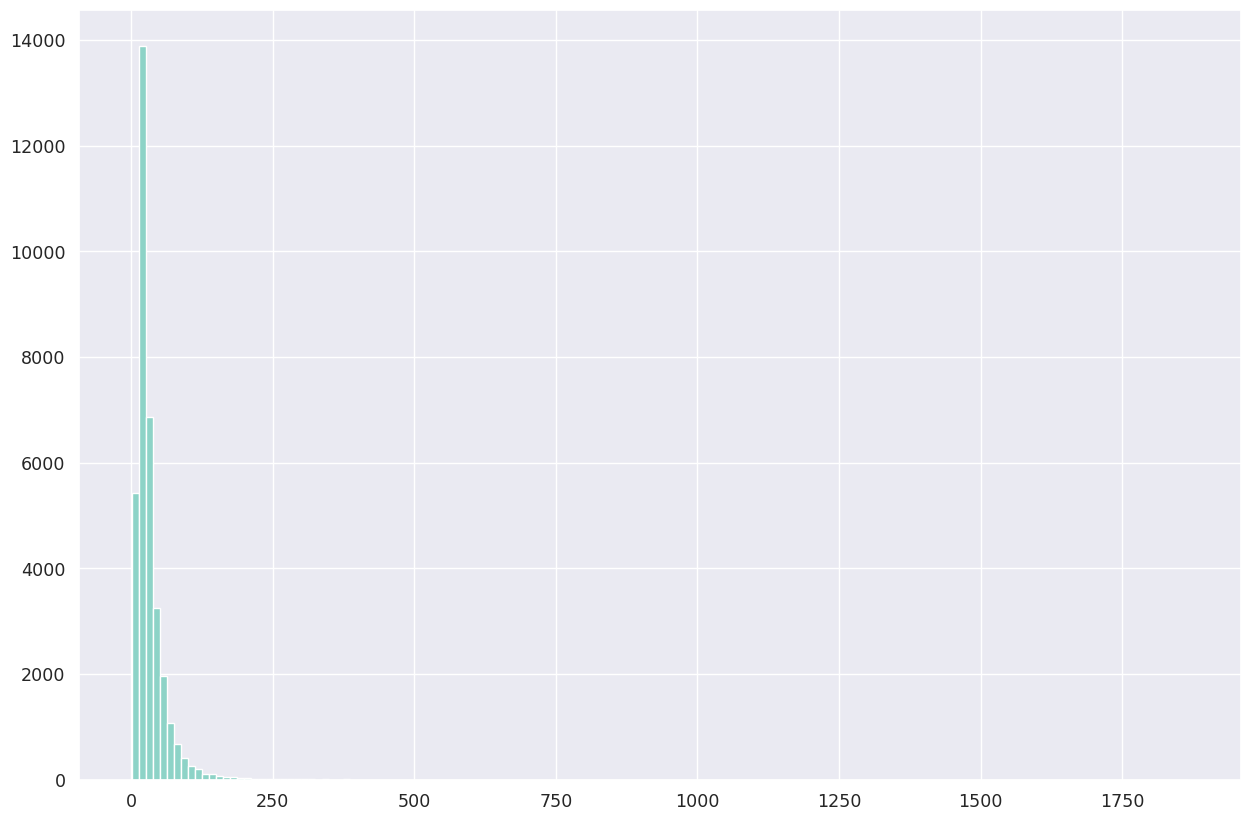

In [37]:
df_reviews["word_count"].hist(bins=150, figsize=(15, 10))

**Top 10 Reviews with highest Polarity**

In [38]:
top_10= df_reviews.nlargest(10, ['Polarity']).ReviewText
top_10

48     Tablet is perfect for beginners who just want ...
248    Excellent resource for children video streamin...
250    best choice under 100$ in marketamazon is the ...
274    It's a excellent tablet for my kid she downloa...
278    Love everything about my Kindle. I'm a long-te...
348    This tablet is perfect for just about anything...
461    I bought this for my wife because she plays a ...
481    Perfect thing I needed to read books on and pl...
514    Bought it for my husband and he loves it. This...
594    For the price this is perfect. I read books, s...
Name: ReviewText, dtype: object

**Top 10 Reviews with lowest Polarity**

In [39]:
top_low10= df_reviews.nsmallest(10, ['Polarity']).ReviewText
top_low10

3947     I don't like this tablet as Android is not wor...
16563    I bought this for my grandson and it hasn't di...
31801    Works just as well as my Rokus, however the in...
31889    Goodbye outrageous satellite bills...hello Ama...
2543     We are a Kindle family! Use them all the time!...
7289     I hate it, there isn't any organization for th...
12671    Does everything you need and for $50! It inclu...
2435     Unable to download the Instagram app. which st...
31321    Like the fire but disappointed that they were ...
32521    I was tired of the insane cable bills, so I bo...
Name: ReviewText, dtype: object

**Compare value_Counts of columns Sentiment(made using Ratings) and Analysis(made using Polarity).**

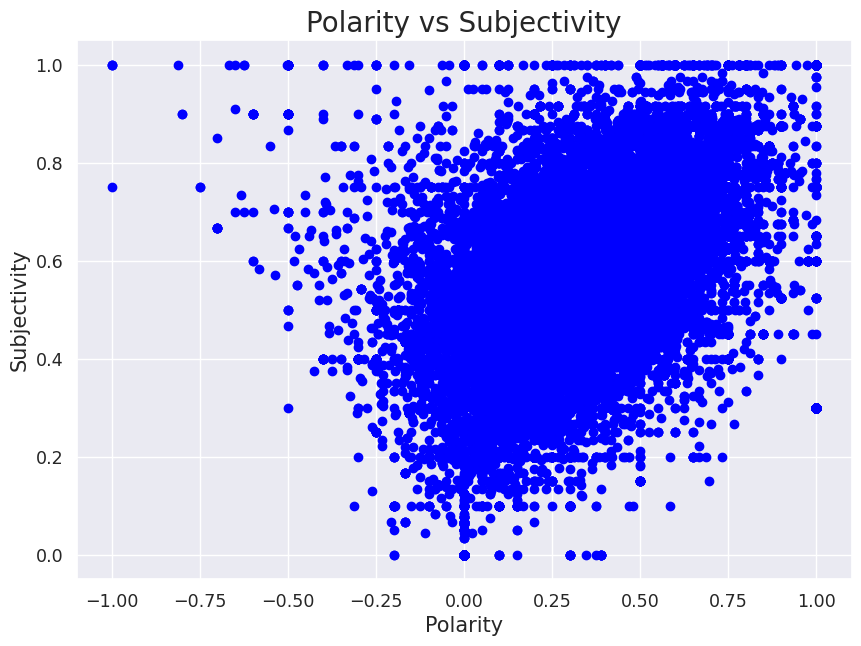

In [40]:
plt.figure(figsize=(10,7))
plt.scatter(df_reviews['Polarity'], df_reviews['Subjectivity'], color='blue')
plt.title("Polarity vs Subjectivity", fontsize=20)
plt.xlabel('Polarity',fontsize=15)
plt.ylabel('Subjectivity',fontsize=15)
plt.show();

**Encoding target variable- Sentiment with label_encoder**

In [60]:
label_encoder = preprocessing.LabelEncoder()

df_reviews['Sentiment']= label_encoder.fit_transform(df_reviews['Sentiment'])

print(df_reviews['Sentiment'].unique())
print(df_reviews['Sentiment'].value_counts())

[2 0 1]
2    32316
1     1499
0      812
Name: Sentiment, dtype: int64


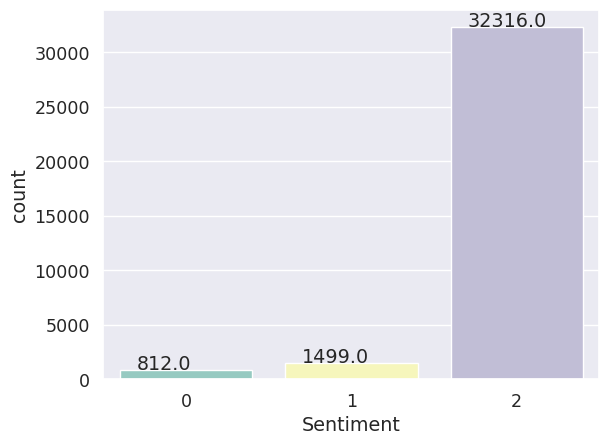

In [61]:
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='Sentiment',data=df_reviews)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [64]:
df_reviews['ReviewText'][4]

'I bought this for my grand daughter when she comes over to visit. I set it up with her as the user, entered her age and name and now Amazon makes sure that she only accesses sites and content that are appropriate to her age. Simple to do and she loves the capabilities. I also bought and installed a 64gig SD card which gives this little tablet plenty of storage. For the price I think this tablet is best one out there. You can spend hundreds of dollars more for additional speed and capacity but when it comes to the basics this tablets does everything that most people will ever need at a fraction of the cost.Fantastic Tablet for kids'

**WordCloud Visualization**

Positive Review and Negative Review

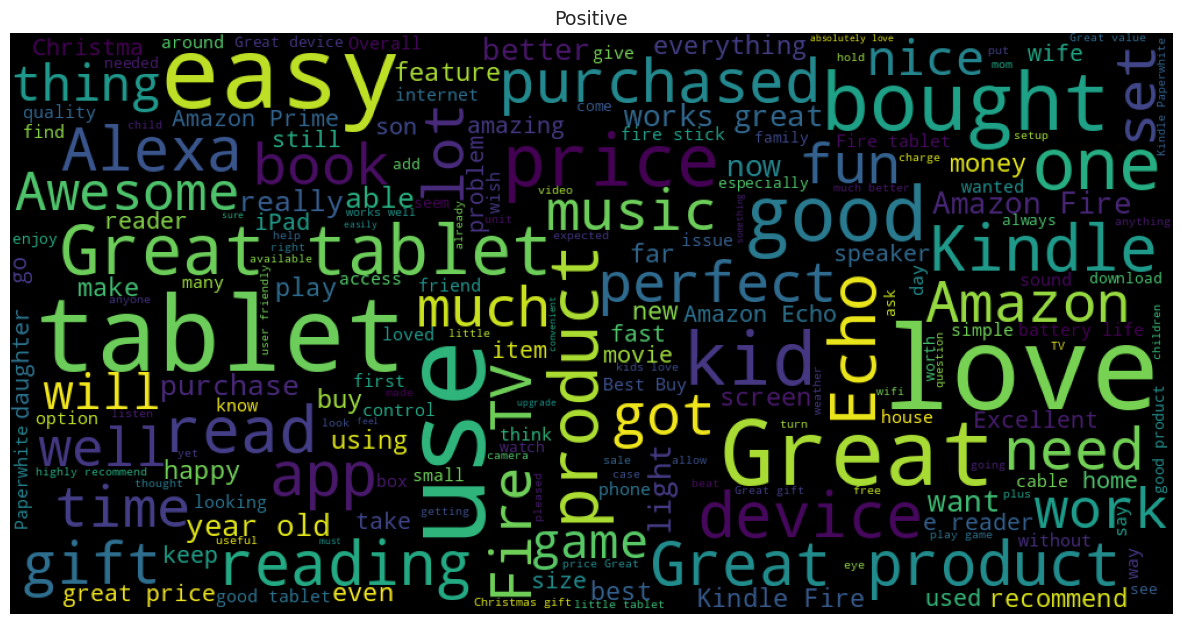

In [69]:
#### Positive Review
words = ' '.join([w for w in df_reviews['ReviewText'][df_reviews.Sentiment==2]])
wordCloud = WordCloud(width=1000, height=500, random_state=5, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordCloud)
plt.title('Positive')
plt.axis('off')
plt.show()


**Negative and Neutral Reviews**

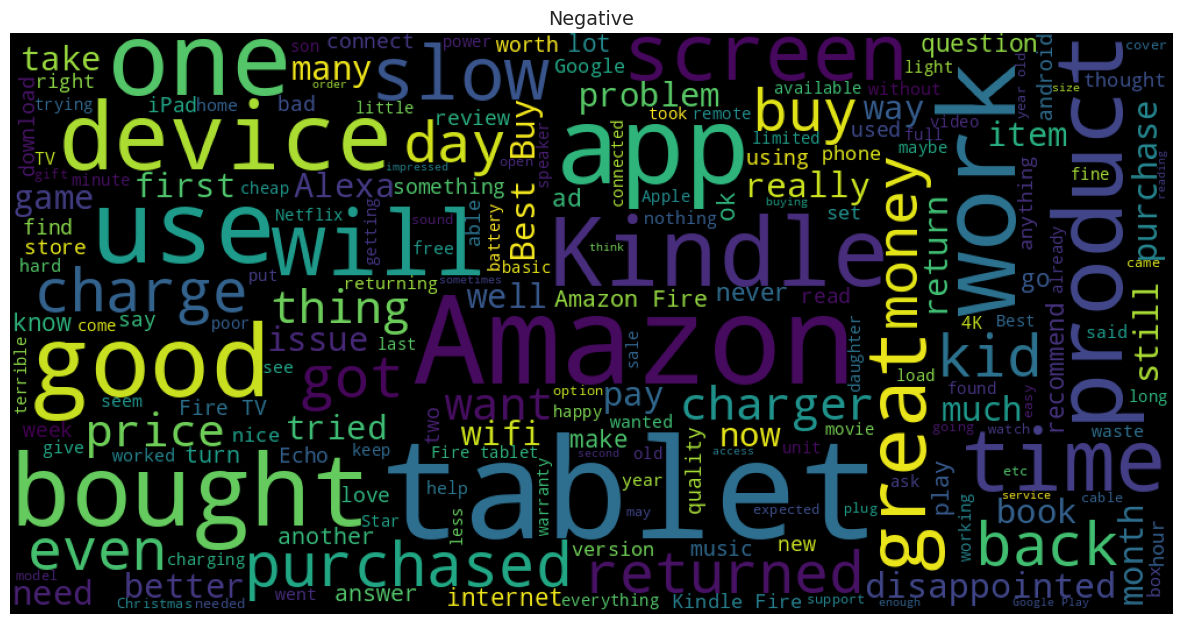

In [72]:
## Negative Reviews
words = ' '.join([w for w in df_reviews['ReviewText'][df_reviews.Sentiment==0]])
wordCloud = WordCloud(width=1000, height=500, random_state=5, max_font_size=120).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordCloud)
plt.title('Negative')
plt.axis('off')
plt.show()


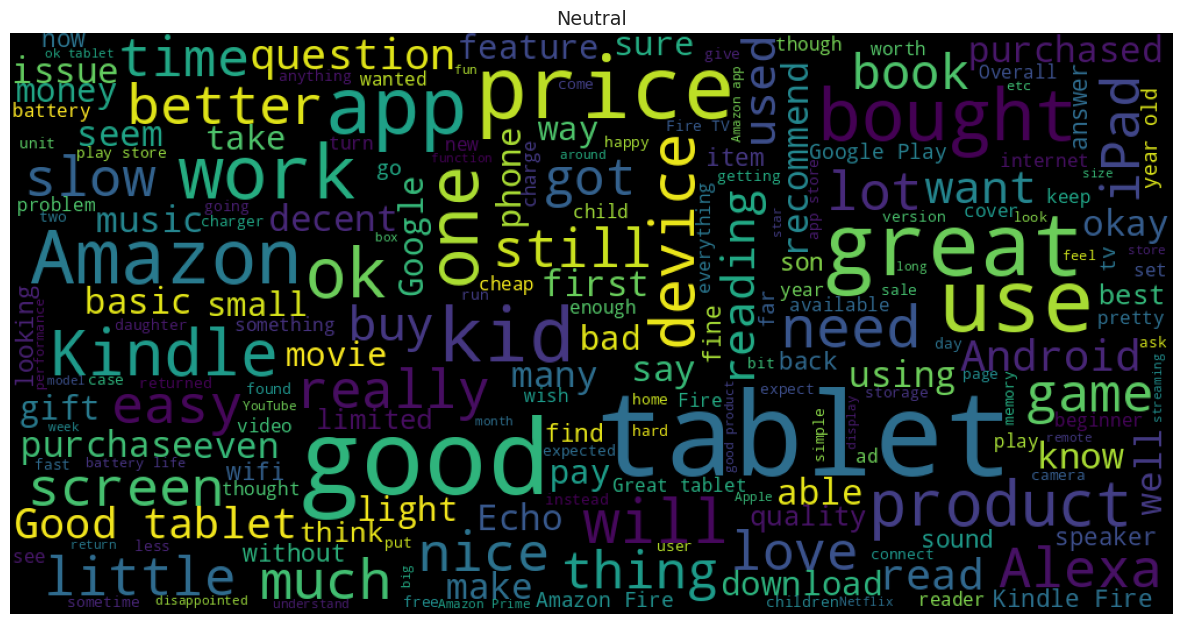

In [74]:
### Neutral Reviews
words = ' '.join([w for w in df_reviews['ReviewText'][df_reviews.Sentiment==1]])
wordCloud = WordCloud(width=1000, height=500, random_state=5, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordCloud)
plt.title('Neutral')
plt.axis('off')
plt.show()


**Valence Aware Dictionary and Sentiment Reasoner**

In [75]:
fid = SentimentIntensityAnalyzer()
df_reviews[['neg', 'neu', 'pos', 'compound']] = df_reviews['ReviewText'].apply(fid.polarity_scores).apply(pd.Series)
df_reviews.head()

,Recommend,Ratings,ReviewText,Sentiment,Subjectivity,Polarity,Polarity_Analysis,review_len,word_count,neg,neu,pos,compound
0,True,5.0,This product so far has not disappointed. My c...,2,0.783333,0.325000,Positive,149,27,0.000,0.656,0.344,0.8899
1,True,5.0,great for beginner or experienced person. Boug...,2,0.750000,0.600000,Positive,84,15,0.000,0.507,0.493,0.8934
2,True,5.0,Inexpensive tablet for him to use and learn on...,2,0.450000,0.350000,Positive,170,33,0.000,0.914,0.086,0.4404
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,2,0.731250,0.399583,Positive,600,117,0.036,0.679,0.286,0.9892
4,True,5.0,I bought this for my grand daughter when she c...,2,0.616226,0.368056,Positive,638,120,0.000,0.916,0.084,0.7876


**Defining StopWORDS**

In [76]:
stop_WORDS=['myself', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves','him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on','over', 'under', 'further', 'then', 'here', 'there', 'when', 'where', 'why', 'how', 'own', 'so', 'than', 'too', 'very','can','just', 'now']


**NLP**

In [77]:
def nlp(df,column_name):

    #Convert everything to lowercase
    df[column_name] = df[column_name].str.lower()

    #Removing Punctuation, Numbers, and Special Characters
    df[column_name] = df[column_name].str.replace("[^a-zA-Z!'#]"," ")

    #Remove Stopwords
    df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_WORDS)]))

    #Data Tokenization
    data_tokenized = df[column_name].apply(lambda x : x.split())

    #Removing words having length<3
    data_tokenized = data_tokenized.apply(lambda x: [w for w in x if len(w)>2])

    #Stemming
    stemmer = PorterStemmer()
    data_tokenized = data_tokenized.apply(lambda x: [stemmer.stem(i) for i in x])

    #Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #data_tokenized = data_tokenized.apply(lambda x: [lemmatizer.lemmatize(i,wordnet.VERB) for i in x])

    #Putting tokens back together
    data_tokenized=data_tokenized.apply(lambda x:' '.join(x))
    df[column_name] = data_tokenized

In [78]:
nlp(df_reviews,'ReviewText')

In [79]:
df_reviews.head()

,Recommend,Ratings,ReviewText,Sentiment,Subjectivity,Polarity,Polarity_Analysis,review_len,word_count,neg,neu,pos,compound
0,True,5.0,thi product far ha not disappoint children lov...,2,0.783333,0.325000,Positive,149,27,0.000,0.656,0.344,0.8899
1,True,5.0,great for beginn experienc person bought gift ...,2,0.750000,0.600000,Positive,84,15,0.000,0.507,0.493,0.8934
2,True,5.0,inexpens tablet for him use and learn step fro...,2,0.450000,0.350000,Positive,170,33,0.000,0.914,0.086,0.4404
3,True,4.0,i'v had fire two week now and love thi tablet ...,2,0.731250,0.399583,Positive,600,117,0.036,0.679,0.286,0.9892
4,True,5.0,bought thi for grand daughter when she come ov...,2,0.616226,0.368056,Positive,638,120,0.000,0.916,0.084,0.7876


**Feature Engineering and Selection**

In [81]:
## Count Vectorizer
count_vect = CountVectorizer(max_features=5000,max_df=0.80, min_df=2)

X = count_vect.fit_transform(df_reviews['ReviewText'])

#cv_df = pd.DataFrame(X.todense())

cv = pd.DataFrame(X.toarray(), columns=count_vect.get_feature_names_out())
cv.head()

,aaa,abandon,abc,abcmous,abil,abl,about,abov,abroad,absolut,...,youth,youtub,yr,yup,zero,zip,zippi,zone,zoo,zoom
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#### TF-IDF : Term Frequency-Inverse Document Frequency
#tfidf_vect = TfidfVectorizer(max_df=0.80, min_df=2,max_features=1000)

#features = tfidf_vect.fit_transform(data['ReviewText'])

#tfidf = pd.DataFrame(features.toarray(), columns=tfidf_vect.get_feature_names())
#tfidf_df = pd.DataFrame(X.todense())
#print(tfidf_df.shape)
#tfidf.head()

In [84]:
y=df_reviews['Sentiment']

**Partition the dataset into Train and Test**

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)
print('Train Set Shape:{}\nTest Set Shape:{}'.format(X_train.shape, X_test.shape))

Train Set Shape:(24238, 5000)
Test Set Shape:(10389, 5000)


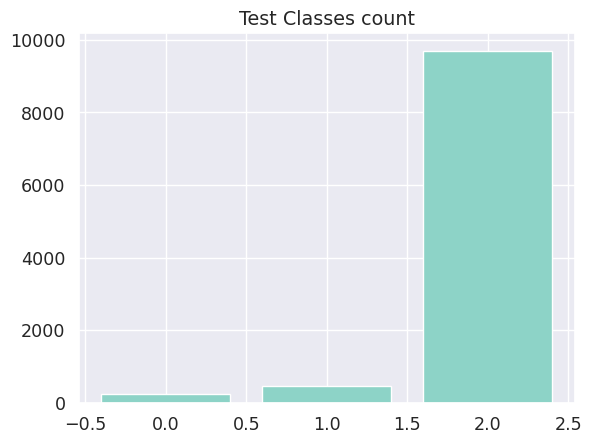

In [86]:
##Test Count Visualization
counts=y_test.value_counts()
plt.title("Test Classes count")
plt.bar(counts.index, counts.values)
plt.show()

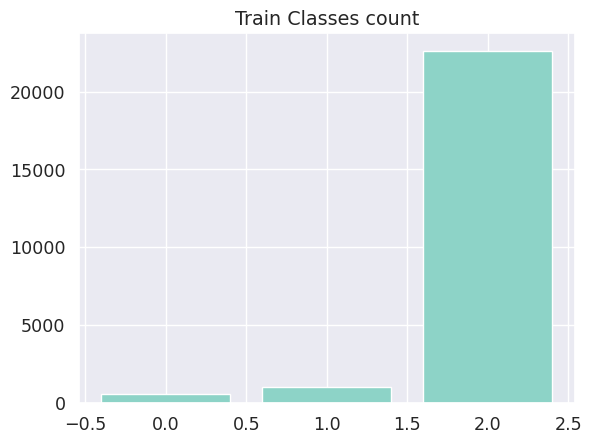

In [87]:
#### Train Count Visualization
counts=y_train.value_counts()
plt.title("Train Classes count")
plt.bar(counts.index, counts.values)
plt.show()


**Fitting Models**

**Naive Bayes**

In [88]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_tr = classifier.predict(X_train)

In [89]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       572
           1       0.40      0.42      0.41      1047
           2       0.97      0.97      0.97     22619

    accuracy                           0.93     24238
   macro avg       0.66      0.66      0.66     24238
weighted avg       0.94      0.93      0.93     24238

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       240
           1       0.27      0.31      0.29       452
           2       0.96      0.96      0.96      9697

    accuracy                           0.92     10389
   macro avg       0.55      0.55      0.55     10389
weighted avg       0.92      0.92      0.92     10389



Text(0.5, 1.0, 'Confusion Matrix')

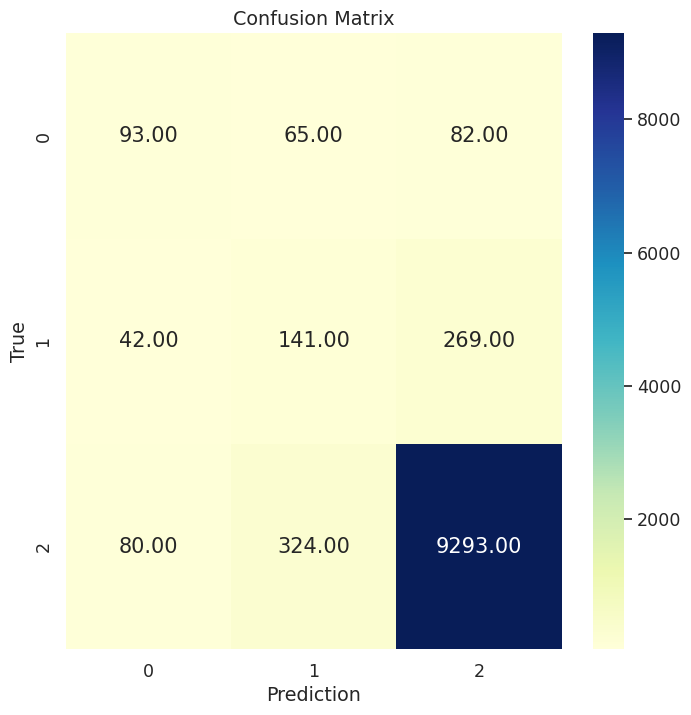

In [90]:
confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['Prediction']).astype(int)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":15}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix')

**Logistic Regression**

In [91]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_tr = classifier.predict(X_train)

In [92]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       572
           1       0.88      0.48      0.62      1047
           2       0.97      1.00      0.98     22619

    accuracy                           0.97     24238
   macro avg       0.94      0.76      0.82     24238
weighted avg       0.97      0.97      0.97     24238

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.53      0.38      0.44       240
           1       0.39      0.23      0.29       452
           2       0.96      0.98      0.97      9697

    accuracy                           0.94     10389
   macro avg       0.63      0.53      0.57     10389
weighted avg       0.92      0.94      0.93     10389



Text(0.5, 1.0, 'Confusion Matrix')

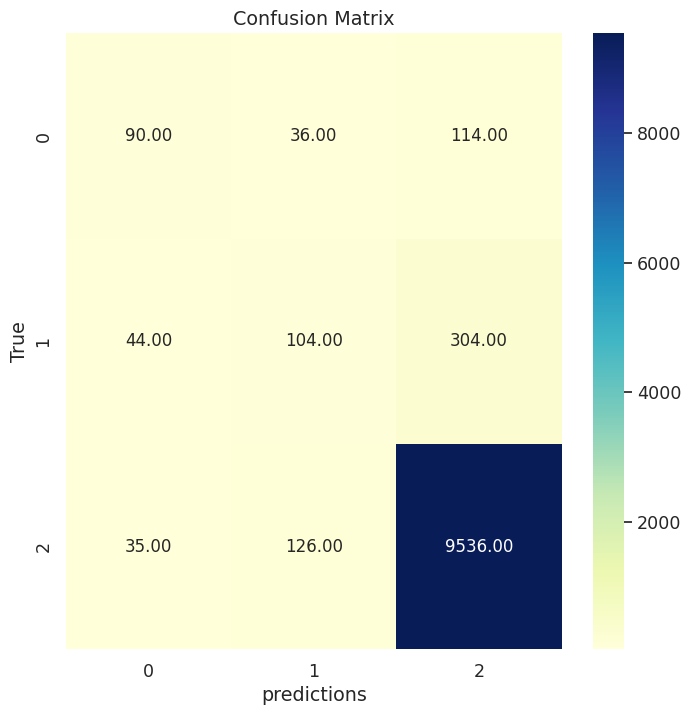

In [93]:
confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['predictions']).astype(int)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix')

**LightGBM**

In [94]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [95]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(objective="multiclass",is_unbalance=True,num_class=3)
clf.fit(X_train, y_train,5000)

# predict the results
y_pred=clf.predict(X_test)
y_pred_tr = classifier.predict(X_train)

In [96]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87       572
         1.0       0.88      0.48      0.62      1047
         2.0       0.97      1.00      0.98     22619

    accuracy                           0.97     24238
   macro avg       0.94      0.76      0.82     24238
weighted avg       0.97      0.97      0.97     24238

Classification Report(Test)
              precision    recall  f1-score   support

         0.0       0.62      0.29      0.40       240
         1.0       0.50      0.12      0.20       452
         2.0       0.95      0.99      0.97      9697

    accuracy                           0.94     10389
   macro avg       0.69      0.47      0.52     10389
weighted avg       0.92      0.94      0.92     10389



Text(0.5, 1.0, 'Confusion Matrix')

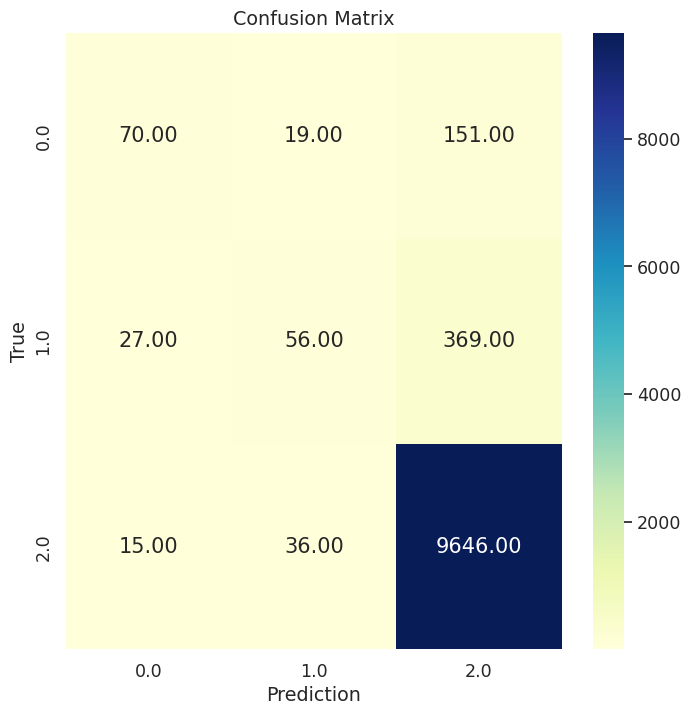

In [97]:
confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['Prediction']).astype(int)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":15}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix')

**ROC-AUC curve**

This is a very important curve where we decide on which threshold to setup based upon the objective criteria. Here we plotted ROC for different classes which can help us understand which class was classified better. Also we plot micro and macro averages on the roc curve.

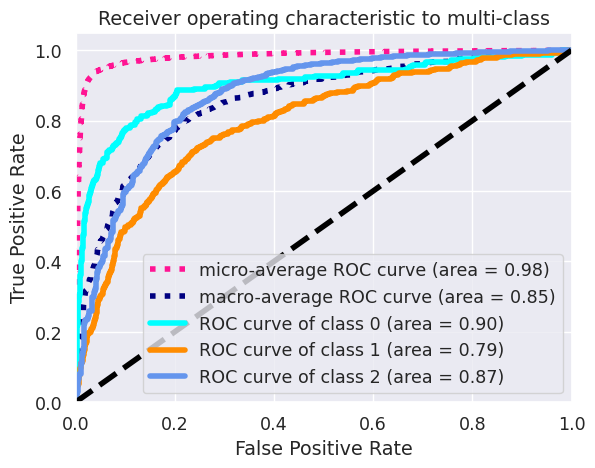

In [98]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr

tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

**Insights:**

Considering the ROC curve for classes, class 2 and 0 have been classified pretty well a their area under the curve is high. We can chose any threshold between 0.8-1.0 to get the optimal number of TPR and FPR
Coming to micro and macro average, micro average preforms really well and macro average reports a score not really bad.

To understand the idea behind micro and macro average , just remember the following 'A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is normally chosen if you suspect there might be class imbalance'